In [16]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from scipy.stats import zscore

# Configure Logger
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()
logger.info("Libraries imported and logger configured.")


2025-01-03 16:21:02,610 - INFO - Libraries imported and logger configured.


In [17]:
# Load Data
train = pd.read_csv('../data/raw/train.csv')
test = pd.read_csv('../data/raw/test.csv')
store = pd.read_csv('../data/raw/store.csv')

logger.info(f"Train dataset shape: {train.shape}")
logger.info(f"Test dataset shape: {test.shape}")
logger.info(f"Store dataset shape: {store.shape}")

# Preview Data
display(train.head())
display(store.head())


C:\Users\Hp\AppData\Local\Temp\ipykernel_20372\1159151337.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../data/raw/train.csv')
2025-01-03 16:23:07,564 - INFO - Train dataset shape: (1017209, 9)
2025-01-03 16:23:07,564 - INFO - Test dataset shape: (41088, 8)
2025-01-03 16:23:07,580 - INFO - Store dataset shape: (1115, 10)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [18]:
# Check Missing Values
logger.info("Checking missing values...")
logger.info(train.isnull().sum())
logger.info(store.isnull().sum())

# Fill Missing Values
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace=True)
store['PromoInterval'].fillna('None', inplace=True)
logger.info("Missing values handled.")


2025-01-03 16:23:27,630 - INFO - Checking missing values...
2025-01-03 16:23:27,710 - INFO - Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
2025-01-03 16:23:27,717 - INFO - Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64
C:\Users\Hp\AppData\Local\Temp\ipykernel_20372\1921594317.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

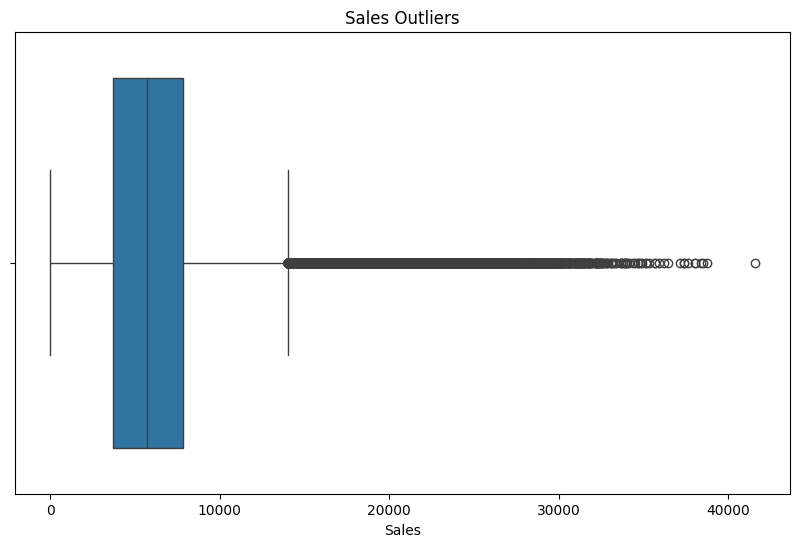

2025-01-03 16:23:50,388 - INFO - Outliers removed from Sales.


In [19]:
# Detect Outliers in Sales
plt.figure(figsize=(10, 6))
sns.boxplot(data=train, x='Sales')
plt.title('Sales Outliers')
plt.show()

# Handle Outliers
z_scores = zscore(train['Sales'])
train = train[(np.abs(z_scores) < 3)]
logger.info("Outliers removed from Sales.")


In [20]:
# Convert Date Column
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

# Extract Date Features
for df in [train, test]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week
    df['Weekday'] = df['Date'].dt.weekday

logger.info("Date features extracted.")


2025-01-03 16:24:03,529 - INFO - Date features extracted.


In [22]:
# Process Promo Interval
months_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
              'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

# Replace 'Sept' with 'Sep' in PromoInterval and then apply the month mapping
store['PromoMonths'] = store['PromoInterval'].apply(
    lambda x: [months_map[m] for m in x.replace('Sept', 'Sep').split(',')] if x != 'None' else [])

logger.info("PromoInterval processed.")


2025-01-03 16:25:38,477 - INFO - PromoInterval processed.


In [23]:
# Merge Data
train = pd.merge(train, store, on='Store', how='left')
test = pd.merge(test, store, on='Store', how='left')

logger.info("Train and test datasets merged with store data.")


2025-01-03 16:26:00,482 - INFO - Train and test datasets merged with store data.


2025-01-03 16:26:14,415 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 16:26:15,165 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 16:26:15,638 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 16:26:15,651 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


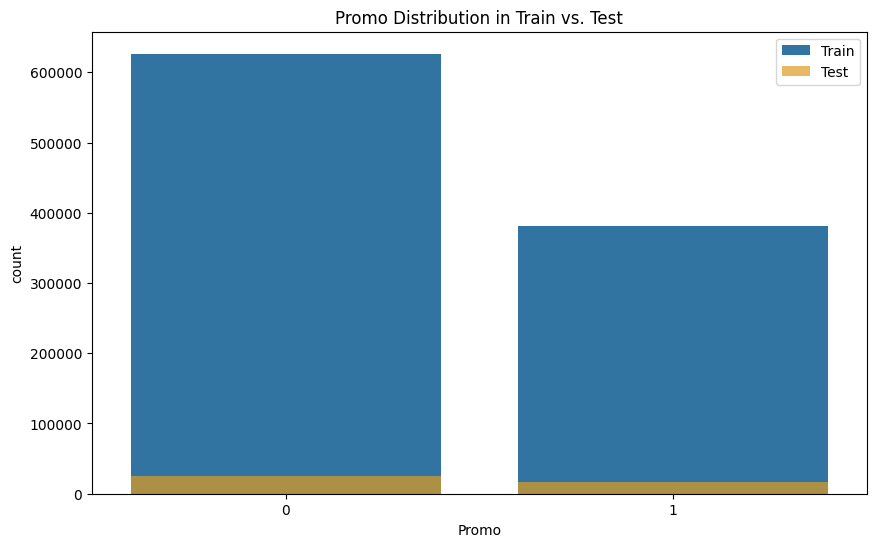

2025-01-03 16:26:15,765 - INFO - Promo distribution plotted.


In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='Promo', label='Train')
sns.countplot(data=test, x='Promo', label='Test', color='orange', alpha=0.7)
plt.legend()
plt.title('Promo Distribution in Train vs. Test')
plt.show()

logger.info("Promo distribution plotted.")


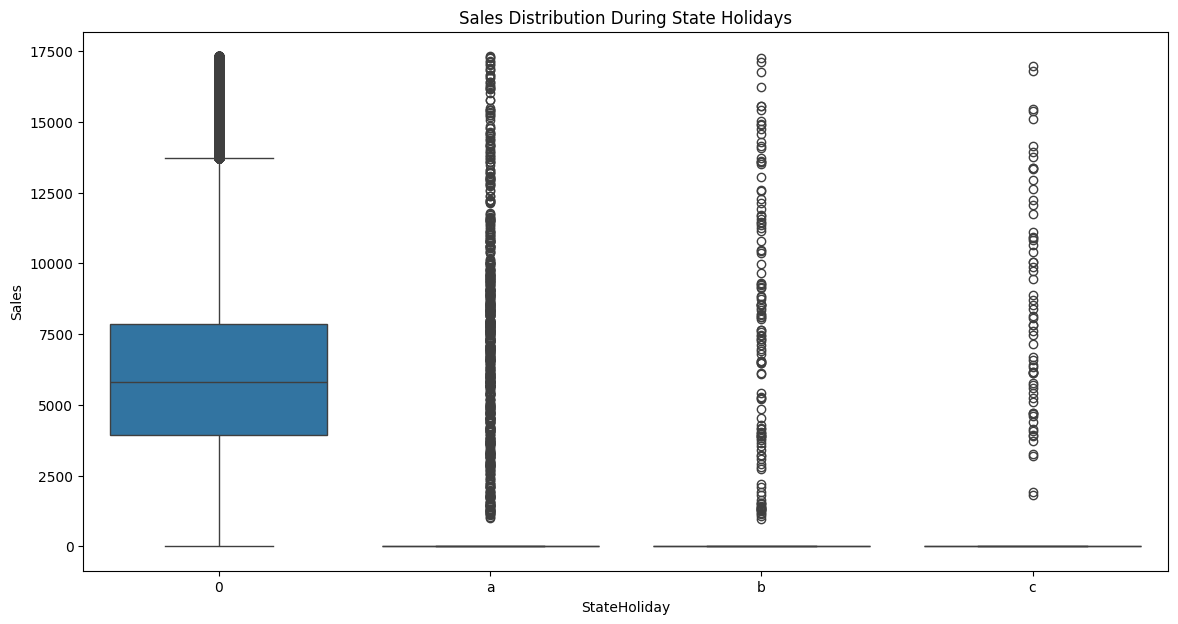

2025-01-03 16:26:28,498 - INFO - Holiday sales behavior analyzed.


In [25]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=train, x='StateHoliday', y='Sales')
plt.title('Sales Distribution During State Holidays')
plt.show()

logger.info("Holiday sales behavior analyzed.")


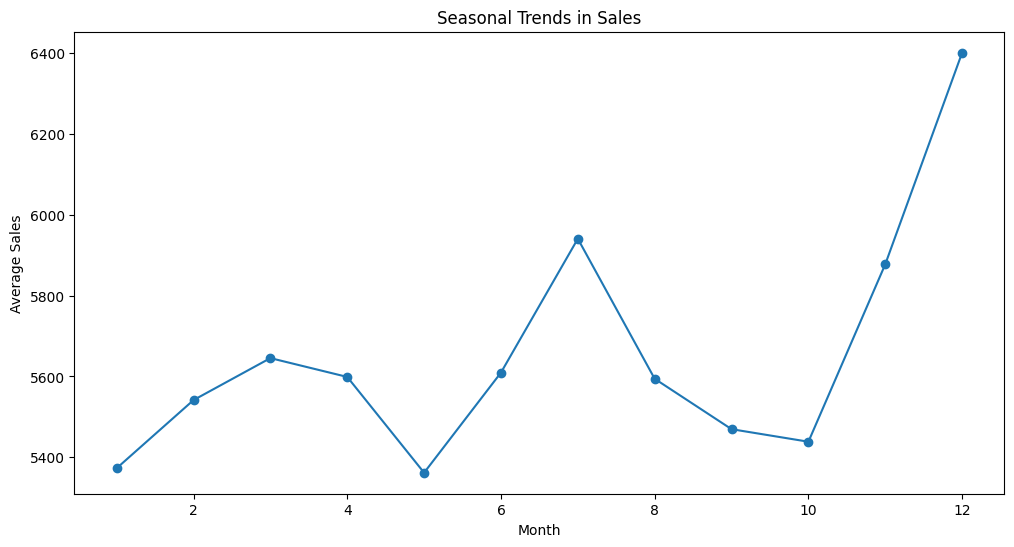

2025-01-03 16:26:40,942 - INFO - Seasonal trends visualized.


In [26]:
train.groupby('Month')['Sales'].mean().plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Seasonal Trends in Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.show()

logger.info("Seasonal trends visualized.")


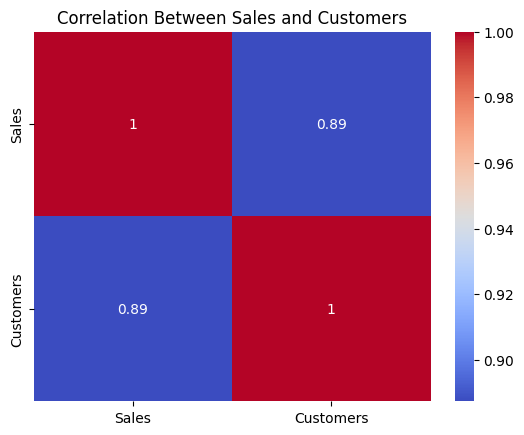

2025-01-03 16:26:48,602 - INFO - Correlation analysis completed.


In [27]:
correlation = train[['Sales', 'Customers']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Sales and Customers')
plt.show()

logger.info("Correlation analysis completed.")


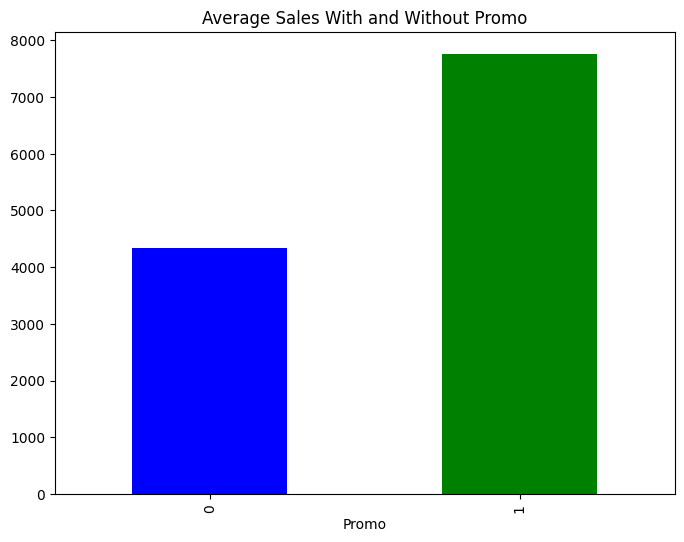

2025-01-03 16:26:56,469 - INFO - Promo effectiveness analyzed.


In [28]:
promo_effect = train.groupby('Promo')['Sales'].mean()
promo_effect.plot(kind='bar', color=['blue', 'green'], figsize=(8, 6))
plt.title('Average Sales With and Without Promo')
plt.show()

logger.info("Promo effectiveness analyzed.")


In [29]:
# Save Cleaned Data
train.to_csv('../data/raw/cleaned_train.csv', index=False)
logger.info("Cleaned train dataset saved.")


2025-01-03 16:27:53,184 - INFO - Cleaned train dataset saved.
